In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/result_gender.csv', index_col=False)
df

,Code,Language,GoogleTranslate,DeepL,GPT,Gemini,Copilot,GrammaticalGender,Family
0,aar,Afar,1,0,0,0,0,1,Afro-Asiatic
1,sqi,Albanian,1,0,1,1,0,1,Indo-European
2,amh,Amharic,1,0,1,0,0,1,Afro-Asiatic
3,ara,Arabic,1,1,1,1,1,1,Afro-Asiatic
4,bel,Belarusian,1,0,1,1,0,1,Indo-European
...,...,...,...,...,...,...,...,...,...
57,ukr,Ukrainian,1,1,1,1,1,1,Indo-European
58,urd,Urdu,1,0,1,1,0,1,Indo-European
59,vec,Venetian,1,0,0,0,0,1,Indo-European
60,cym,Welsh,1,0,1,1,1,1,Indo-European


In [16]:
family = df.groupby('Family')['Family'].count().reset_index(name='Count').sort_values(by='Count', ascending=False)
family['Percentage'] = round((family['Count'] / family['Count'].sum()) * 100, 2)
family

,Family,Count,Percentage
2,Indo-European,50,80.65
0,Afro-Asiatic,8,12.90
4,Niger-Congo,2,3.23
1,Dravidian,1,1.61
3,Nakh-Daghestanian,1,1.61


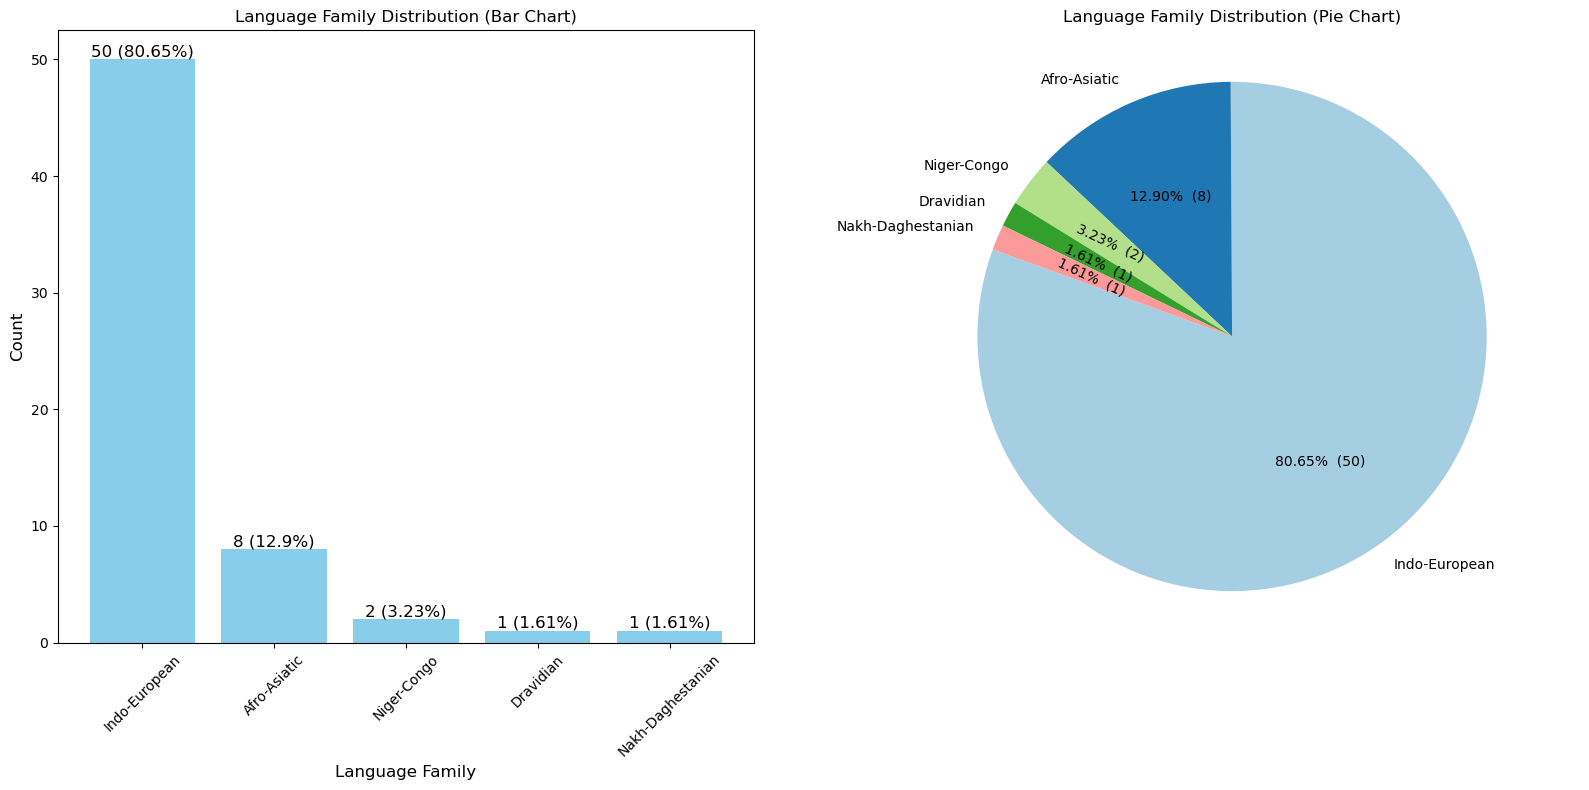

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Bar chart
bars = axs[0].bar(family['Family'], family['Count'], color='skyblue')
axs[0].set_title('Language Family Distribution (Bar Chart)', fontsize=12)  # Increased title font size
axs[0].set_xlabel('Language Family', fontsize=12)  # Increased x-axis label font size
axs[0].set_ylabel('Count', fontsize=12)  # Increased y-axis label font size
axs[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Annotate each bar with count and percentage
for bar, count, percentage in zip(bars, family['Count'], family['Percentage']):
    yval = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width()/2, yval, f'{count} ({percentage}%)', 
                 ha='center', va='bottom', fontsize=12)

# Pie chart
patches, labels, pct_texts = axs[1].pie(family['Count'],
            labels=family['Family'],
            autopct=lambda p: f"{p:.2f}%  ({p * family['Count'].sum() / 100:,.0f})",
            startangle=160,
            colors=plt.cm.Paired.colors)

axs[1].set_title('Language Family Distribution (Pie Chart)', fontsize=12)  # Increased title font size
axs[1].axis('equal')  # Equal aspect ratio ensures that pie chart is a circle.

for i, pct_text in enumerate(pct_texts):
    if family['Count'].iloc[i] <= 2: 
        pct_text.set_rotation(-25)

# Adjust layout
plt.tight_layout()
plt.show()